# Introduction


Nama: Muhammad Daffa Al Rasyid


# Background

Perusahaan H8 merupakan perusahaan yang berada dalam industri fashion dan menjual berbagai pakaian serta aksesoris lainnya. Perushaan mereka juga berbasis di daerah Jakarta dan menjual produk mereka hanya secara online. Dengan mendekatinya tahun baru, mereka ingin melakukan evaluasi apa yang perlu ditingkatkan dari website mereka dan lebih mengetahui ciri-ciri pengunjung yang akhirnya melakukan pembelian di website mereka, maka dari itu perusahaan H8 mengumpulkan data terkait jumlah pengunjung yang mengunjungi website mereka, serta mana dari pengunjung itu yang melakukan pembelian tetapi karena keterbasan data dan sumber daya hanya data dari 10 bulan terakhir yang berhasil terkumpul dimana ada beberapa bulan yang tidak terkumpul datanya, maka dari itu pihak H8 ingin membuat model machine learning utnuk bisa memprediksi sifat-sifat apa yang ditunjukan oleh pengunjung website mereka yang pada akhirnya akan melakukan pembelian di website mereka.


# Data

Data: online_shoppers_intention.csv

Description: Data yang digunakan dalam proses ini adalah data tentang jumlah pengunjung website selama 10 bulan dimana dataframe juga menampilkan berbagai ciri-ciri serta durasi mereka di website untuk pengunjung yang membeli dan pengunjung yang tidak membeli

Berikut merupakan penjelasan singkat tentang column-column yang akan digunakan di proses ini:
| Variable     | Description                                                |
|--------------|------------------------------------------------------------|
| Administrative           | Ini adalah jumlah halaman jenis ini (administratif) yang dikunjungi pengguna.            |
| Administrative_Duration     | Ini adalah jumlah waktu yang dihabiskan dalam kategori halaman ini|
| Informational      |Ini adalah jumlah halaman jenis ini (informasi) yang dikunjungi pengguna.  |
| Informational_Duration   | Ini adalah jumlah waktu yang dihabiskan dalam kategori halaman ini|
|ProductRelated | Ini adalah jumlah halaman jenis ini (produk terkait) yang dikunjungi pengguna.|
| ProductRelated_Duration   |  Ini adalah jumlah waktu yang dihabiskan dalam kategori halaman ini|
| BounceRates     | Persentase pengunjung yang masuk ke situs web melalui halaman tersebut dan keluar tanpa memicu tugas tambahan apa pun.|
|ExitRates| Persentase tampilan halaman di situs web yang berakhir pada halaman tertentu.|
|PageValues| Nilai rata-rata halaman yang dirata-ratakan dari nilai halaman target dan/atau penyelesaian transaksi eCommerce. Informasi lebih lanjut tentang cara penghitungannya|
| SpecialDay           |Nilai ini menunjukkan kedekatan tanggal penelusuran dengan hari atau hari libur khusus (misalnya Hari Ibu atau Hari Valentine) di mana transaksi lebih mungkin diselesaikan. Informasi lebih lanjut tentang bagaimana nilai ini dihitung di bawah ini.|
| Month      | Berisi bulan terjadinya pembacaan halaman, dalam bentuk string|
| OperatingSystems      |Nilai integer yang mewakili sistem operasi yang digunakan pengguna saat melihat halaman.|
| Browser | Nilai integer yang mewakili browser yang digunakan pengguna untuk melihat halaman.|
| Region   | Nilai integer yang mewakili di wilayah mana pengguna berada.|
| TrafficType  |  Nilai bilangan bulat yang mewakili jenis lalu lintas yang dikategorikan sebagai pengguna. Baca lebih lanjut tentang jenis lalu lintas di sini.|
| VisitorType      |String yang merepresentasikan apakah pengunjung adalah Pengunjung Baru, Pengunjung Kembali, atau Lainnya.|
| Weekend      | Boolean yang menunjukkan apakah sesi sedang berlangsung di akhir pekan|
| Revenue       | Boolean yang merepresentasikan apakah pengguna menyelesaikan pembelian atau tidak.|

Informasi lebih lanjut terkait Page Values: https://support.google.com/analytics/answer/2695658?hl=en

Informasi lebih lanjut terkait TrafficType: https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics

Informasi lebih lanjut terkait Region: (1: Jabodetabek, 2: Jawa Barat, 3: Jawa Tengah, 4:Jawa Timur, 5:Bali,NTB,NTT, 6: Sumatera Selatan, Lampung, Bengkulu, Bangka Belitung, 7: Sumatera Utara, Aceh, Sumatera Barat, Kepulauan Riau, 8: Kalimantan, 9: Sulawesi)




Objective: Mampu memprediksi secara akurat perilaku pengunjung apakah pengunjung akan melakukan pembelian atau tidak di website dari data-data yang ada

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train_test_split
from sklearn.model_selection import train_test_split
# minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# Ordinal Encoder
from sklearn.preprocessing import OneHotEncoder
# Smotenc
from imblearn.over_sampling import SMOTENC
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# PCA
from sklearn.decomposition import PCA
# classification model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
# classification evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Data Loading

In [2]:
# Mengimport Data
df_ori = pd.read_csv('online_shoppers_intention.csv')
df = df_ori.copy()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Cek Missing Value
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Dari database ini tidak ada data yang missing value atau Nan

In [6]:
# Cek duplikat
df.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

Dari hasil diatas, terdapat 125 data yang terduplikat maka dari itu kita akan hapus data yang terduplikat tersebut

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

Langkah selanjutnya adalah untuk membuat data yang akan dipakai dalam model inference nantinya

In [9]:
data_inf = df.sample(1, random_state=123)

# menghapus data inference dari df
df.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menghapus target di data_inf
data_inf.drop(['Revenue'], axis=1, inplace=True)

In [10]:
data_inf.to_csv('data_inf.csv')

# Exploratory Data Analysis

In [10]:
# Menghitung jumlah pengguna yang membeli 
buy_count = df['Revenue'].value_counts()
buy_count

Revenue
False    10296
True      1908
Name: count, dtype: int64

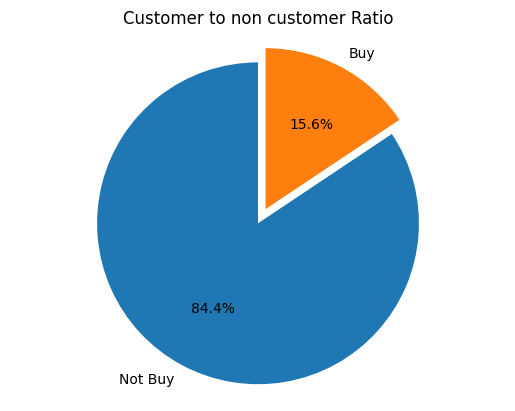

In [11]:
plt.pie(buy_count,
        labels=['Not Buy', 'Buy'], startangle=90,
        autopct='%1.1f%%', explode=[0,0.1])
plt.axis('equal')
plt.title('Customer to non customer Ratio')

plt.show()

Berdasarkan hasil diatas, dapat dilihat bahwa hanya sebanyak 15.5% dari total pengunjung yang akhirnya membeli sesuatu dari perusahaan atau sekitar 1908 orang dalam jangka waktu 10 bulan, sementara itu sebanyak 84.5% pengunjung atau sebanyak 10422 pengunjung tidak membeli apa-apa dari website. Dari pie chart ini juga menginformasikan ke kita bahwa column revenue sangat tidak seimbang dalam persebaran kelasnya.

<Axes: xlabel='Month', ylabel='Count'>

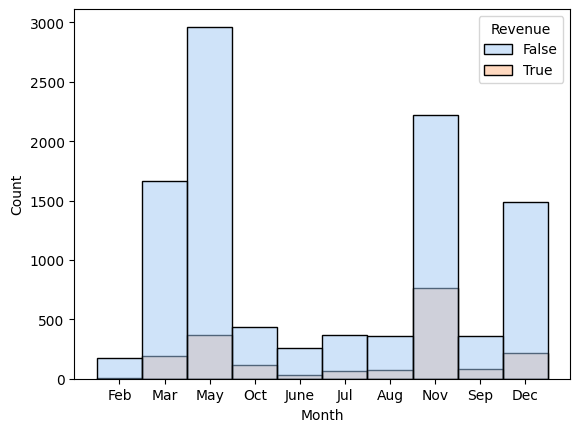

In [13]:
sns.histplot(data=df, x='Month', hue='Revenue', palette='pastel')

Diatas merupakan hasil dari histogram penjualan berdasarkan bulan, jumlah pengunjung terbanyak ada di bulan may diikuti oleh bulan november dan maret. Tetapi jumlah pembeli terbanyak ada di bulan november baru diikuti bulan may, lalu bulan desember. Hal ini bisa di kaitkan dengan bulan November dimana bulan itu sudah merupakan bulan di akhir tahun dan bisa menajdi salah satu alasan banyaknya pembelian. 

In [14]:
df.groupby(by=['Revenue','Month']).Month.agg(["count"])

count
Revenue Month       
False   Aug      357
        Dec     1490
        Feb      178
        Jul      366
        June     256
        Mar     1668
        May     2963
        Nov     2222
        Oct      434
        Sep      362
True    Aug       76
        Dec      216
        Feb        3
        Jul       66
        June      29
        Mar      192
        May      365
        Nov      760
        Oct      115
        Sep       86

Untuk mengelaborasikan histogram diatas, berikut merupakan table group yang menjelaskan rincian penjualan per bulannya. Bisa dilihat bahwa penjualan di bulan november ada sebanyak 760, diikuti di bulan may dengan 365 buah, lalu diikuti oleh bulan desember dengan 216 buah.

<Axes: xlabel='Region', ylabel='Count'>

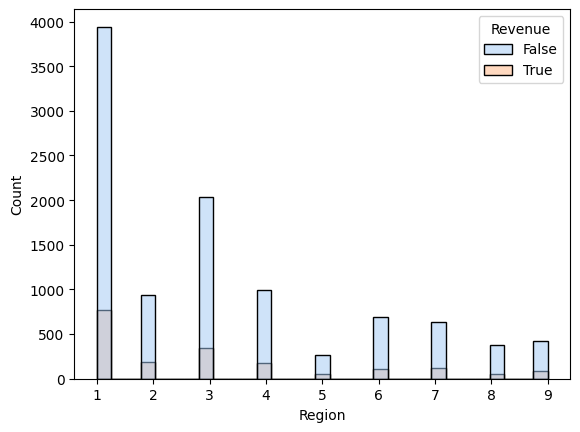

In [15]:
sns.histplot(data=df, x='Region', hue='Revenue', palette='pastel')

Berdasarkan histogram diatas, terlihat bahwa pengguna terbanyak berada di region 1(Jabodetabek) lalu diikuti oleh region 3(Jawa Tengah) dan region 4(Jawa Timur).

In [16]:
df.groupby(by=['Revenue','Region']).Region.agg(["count"])

count
Revenue Region       
False   1        3942
        2         940
        3        2030
        4         996
        5         266
        6         689
        7         639
        8         375
        9         419
True    1         771
        2         188
        3         349
        4         175
        5          52
        6         112
        7         119
        8          56
        9          86

Setelah di telusuri lebih lanjut, region 1 memiliki pelanggan yang melakukan penjualan sebanyak 771 dan memiliki pengguna yang tidak membeli sebanyak 4009, dilanjuti region 3 dengan 349 pelanggan yang membeli dan 2054 pelanggan yang tidak membeli, sementara itu region 2 terdapat 188 pelanggan yang membeli, lalu terdapat 948 pengguna yang tidak membeli.

In [17]:
# Menghitung jumlah tipe pengguna 
visitor_count = df['VisitorType'].value_counts()
visitor_count

VisitorType
Returning_Visitor    10430
New_Visitor           1693
Other                   81
Name: count, dtype: int64

Berdasarkan hasil perhitungan diatas, ternyata kebanyakan pengguna yang meng akses website adalah returning visitor lalu diikuti oleh new visitor. Ini menandakan bahwa, pelanggan yang sebelumnya sudah pernah mengunjungi website nya itu tertarik untuk kembali ke website untuk melihat item-item yang ditawarkan.

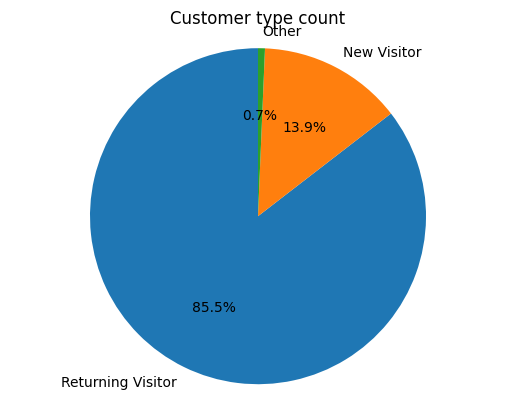

In [18]:
plt.pie(visitor_count,
        labels=['Returning Visitor', 'New Visitor','Other'], startangle=90,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Customer type count')

plt.show()

Dapat terlihat bahwa sebanyak 85.6% dari pengunjung website adalah returning visitor sementara itu sebanyak 13.7% merupakan new visitor atau pengunjung baru.

In [19]:
df.groupby(by=['Revenue','VisitorType']).VisitorType.agg(["count"])

count
Revenue VisitorType             
False   New_Visitor         1271
        Other                 65
        Returning_Visitor   8960
True    New_Visitor          422
        Other                 16
        Returning_Visitor   1470

Setelah di telusuri lebih detail, sebanyak 1470 returning visitor melakukan pembelian di website dan 9081 visitor tidak melakukan pembelian. Lalu sebanyak 422 visitor baru yang melakukan pembelian di website dan 1272 visitor baru tidak melakukan pembelian. Ini menandakan bahwa website yang H8 miliki memiliki kemampuan yang baik untuk membuat para visitor baru untuk melakukan pembelian dimana sebanyak 422 dari total visitor yaitu 1694 atau sebanyak 25% pengunjung baru melakukan pembelian. Sementara itu, untuk pengunjung lama hanya ada sebanyak 1470 dari total pengunjung lama sebanyak 10551. Ini menandakan bahwa hanya 14% pengunjung lama yang melakukan pembelian. Angka total pengunjung lama merupakan angka yang bagus tetapi website H8 memiliki kelemahan dalam meyakinkan pengunjung lama untuk melakukan pembelian 

<Axes: xlabel='Weekend', ylabel='count'>

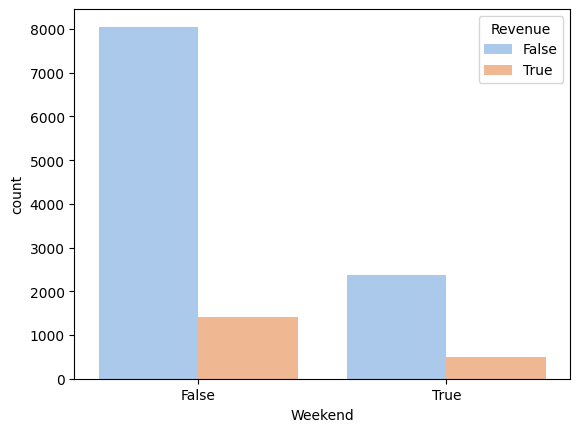

In [4]:
sns.countplot(data=df, x='Weekend', hue='Revenue', palette='pastel')

Berdasarkan count plot diatas, terlihat bahwa lebih banyak pengunjung website di hari kerja dibandingkan dengan weekend serta pembelian pun juga lebih banyak dilakukan di hari kerja dibandingkan dengan weekend.

<Axes: xlabel='ProductRelated_Duration', ylabel='Revenue'>

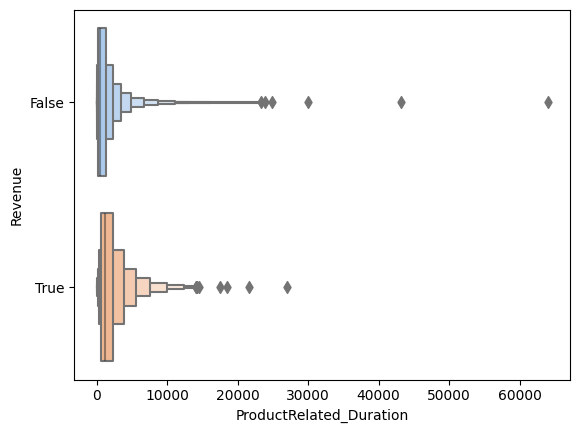

In [21]:
sns.boxenplot(x=df['ProductRelated_Duration'],y=df['Revenue'], palette = 'pastel', orient = 'h')

Berdasarkan hasil diatas, Persebaran untuk pengunjung yang membeli lebih besar dibandingkan untuk pengunjung yang tidak membeli dimana persebaran di bagian pengunjung yang tidak membeli memiliki hasil outlier yang lebih banyak dibandingkan pengguna yang akhirnya membeli. Dari persebaran data ini, ini menunjukan ada nya pengunjung yang sangat lama melihat produk-produk serupa tetapi pada akhirnya tidak melakukan pembelian maka pihak  harus meningkatkan algoritma supaya bisa menarik pengguna-pengguna yang menelusuri website tetapi tidak membeli supaya bisa menemukan produk yang cocok dengan keinginan mereka.

<Axes: xlabel='BounceRates', ylabel='Revenue'>

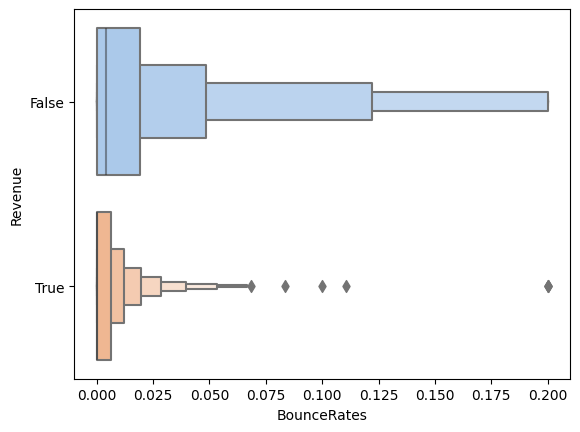

In [22]:
sns.boxenplot(x=df['BounceRates'],y=df['Revenue'], palette = 'pastel', orient = 'h')

Dari box plot diatas, terlihat bahwa kebanyakan pengunjung yang tidak membeli adalah pengunung yang memiliki bounce rate yang tinggi yaitu pengunjung yang tidak membuka halaman lain atau langsung keluar setelah masuk ke website. Ini memberikan informasi bahwa, pihak  harus membuat landing page mereka se menarik dan sebagus mungkin agar bisa membuat pengunjung yang datang ke website supaya ajdi tertarik untuk menelusuri websitenya lebih lanjut untuk melihat produk serta promo yang ditawarkan.

C:\Users\daffa\AppData\Local\Temp\ipykernel_17144\878271880.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=df['PageValues'], y=df['Revenue'], palette = 'pastel',orient = 'h')


<Axes: xlabel='PageValues', ylabel='Revenue'>

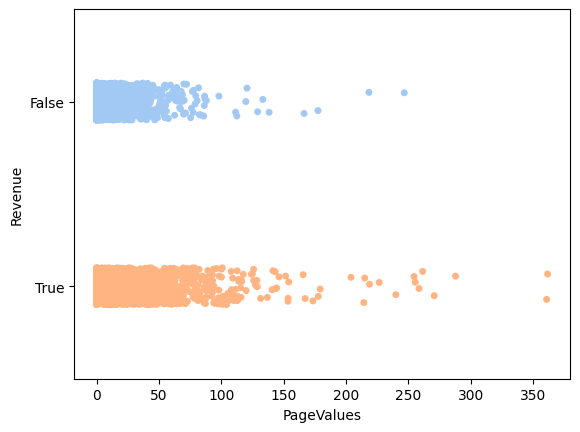

In [23]:
sns.stripplot(x=df['PageValues'], y=df['Revenue'], palette = 'pastel',orient = 'h')

Berdasarakan data diatas, kebanyakan pengunjung yang akhirnya melakukan pembelian adalah pengunjung yang memiliki page values yang tinggi.Berdasarkan informasi dari 'https://support.google.com/analytics/answer/2695658?hl=en' Page Value adalah nilai rata-rata untuk halaman yang dikunjungi pengguna sebelum mendarat di halaman tujuan atau menyelesaikan transaksi Ecommerce (atau keduanya). Nilai ini dimaksudkan untuk memberi pengguna gambaran tentang halaman mana di situs yang memberikan kontribusi lebih besar terhadap pendapatan situs itu sendiri. Maka dari itu, pihak H8 sebaiknya memeriksa halaman mana dari situs mereka yang memberikan page values terbesar agar bisa meningkatkan situs mereka supaya bisa menarik lebih banyak pelanggan lagi.

# Feature Engineering

### Split Features(X) and Target(y)

In [24]:
# Memisahkan X dan y
X = df.drop('Revenue', axis=1)
y = df.Revenue

X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


### Split Train Test Set

In [25]:
#Split menggunakam train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

print('Train size', X_train.shape)
print('test size', X_test.shape)
X_train.head()

Train size (9763, 17)
test size (2441, 17)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
6861,8,221.33,2,70.6,63,5245.277619,0.002740,0.020091,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,False
1562,1,6.00,0,0.0,20,739.833333,0.019048,0.030952,0.0,0.0,Mar,2,2,3,3,Returning_Visitor,True
9661,0,0.00,0,0.0,8,232.500000,0.000000,0.050000,0.0,0.0,Nov,4,2,1,2,New_Visitor,False
1379,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Mar,2,4,3,1,Returning_Visitor,False
3810,2,87.25,0,0.0,56,2094.983333,0.032738,0.063214,0.0,0.8,May,2,4,3,3,Returning_Visitor,False


### Split Numerical and Categorical Column

In [26]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [27]:
# Memisahkan antara column numeric dengan column category
num_col = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cat_col_1 = ['Month','VisitorType','Weekend']
cat_col_2 = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

#Menunjukan num_col and cat_col
print('Numerical columns:', num_col)
print('Categorical columns 1:', cat_col_1)
print('Categorical columns 2:', cat_col_2)

Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
Categorical columns 1: ['Month', 'VisitorType', 'Weekend']
Categorical columns 2: ['OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [28]:
#Memisahkan antara database train dan test berdasarkan jenis Column(category/numeric)

X_train_num = X_train[num_col]
X_train_cat_nom = X_train[cat_col_1]
X_train_cat_ord = X_train[cat_col_2]


X_test_num = X_test[num_col]
X_test_cat_nom = X_test[cat_col_1]
X_test_cat_ord = X_test[cat_col_2]

X_train_cat_nom.head()

,Month,VisitorType,Weekend
6861,Nov,Returning_Visitor,False
1562,Mar,Returning_Visitor,True
9661,Nov,New_Visitor,False
1379,Mar,Returning_Visitor,False
3810,May,Returning_Visitor,False


### Handling Outlier

In [29]:
# Mengecek skewness column numeric
print('skewness:', X_train_num.skew())

skewness: Administrative             1.979540
Administrative_Duration    5.579307
Informational              4.167122
Informational_Duration     7.679699
ProductRelated             4.230391
ProductRelated_Duration    7.762732
BounceRates                3.158515
ExitRates                  2.229467
PageValues                 6.438876
SpecialDay                 3.284683
dtype: float64


Berdasarkan hasil diatas, semua column numerik merupakan column yang tergolong menjadi column dengan persebaran data yang skew atau tidak normal. Hal ini merupakan hal yang normal di data frame ini dikarenakan itu merupakan hal yang wajar karena durasi seseorang meng explore website penjualan itu beda-beda terutama di beberapa column dimana column itu menghitung jumlah durasi seseorang berada di sebuah page informasi, administrasi, dan Related product dimana orang-orang memiliki kecepatan berbeda dalam membaca informasi, mengisi administrasi yang diperlukan serta menjelajahi produk yang lain.

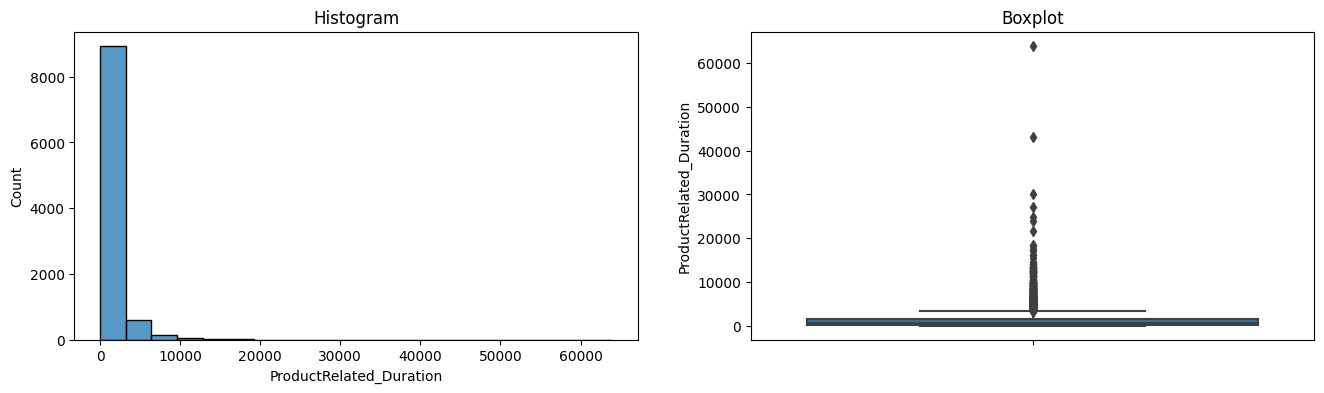

In [30]:
plt.figure(figsize=(16, 4))

 # Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train_num['ProductRelated_Duration'], bins=20)
plt.title('Histogram')

    # Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train_num['ProductRelated_Duration'])
plt.title('Boxplot')

plt.show()

Seperti contohnya pada column product related duration, dimana banyak pengguna yang hanya menjelajahi produk dengan bentar tetapi ada juga pengguna yang lama menjelajahi produk dalam waktu yang lama dimana bisa dikarenakan seseorang sedang mencari produk yang diinginkan untuk keperluan pribadi atau business

Maka dari itu untuk proses ini, data outliers akan dibiarkan saja

### Feature Scaling

In [31]:
# Menunjukan central tendency dari X train set
X_train_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,9763.000000,9763.000000,9763.000000,9763.000000,9763.000000,9763.000000,9763.000000,9763.000000,9763.000000,9763.000000
mean,2.347639,81.962846,0.508245,34.515554,31.961385,1205.685627,0.020388,0.041448,5.980734,0.062030
std,3.345809,177.580138,1.287979,141.863030,44.486103,1950.692653,0.045237,0.046230,18.864205,0.200295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,189.875000,0.000000,0.014082,0.000000,0.000000
50%,1.000000,10.000000,0.000000,0.000000,18.000000,604.500000,0.002941,0.025000,0.000000,0.000000
75%,4.000000,95.085000,0.000000,0.000000,38.000000,1476.827381,0.016667,0.048608,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Dari hasil persebaran diatas, terlihat bahwa angka-angka di column numerik sangat beragam dan agar menghindari model mengfavoritkan angka yang lebih tinggi maka kita akan menggunakan min max scaler agar semua column memiliki kedudukan yang sama.

In [32]:
# Scale menggunakan minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled =  scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.2962963 , 0.065121  , 0.08333333, ..., 0.10045662, 0.        ,
        0.        ],
       [0.03703704, 0.00176535, 0.        , ..., 0.15476191, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02857143, 0.        ,
        0.        ],
       [0.33333333, 0.06222876, 0.16666667, ..., 0.14937343, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01136364, 0.        ,
        0.        ]])

### Feature Encoding

In [33]:
# Encode menggunakan OneHotEncoder
oheencoder = OneHotEncoder()
oheencoder.fit(X_train_cat_nom)

X_train_cat_nom_encoded = oheencoder.transform(X_train_cat_nom).toarray()
X_test_cat_nom_encoded = oheencoder.transform(X_test_cat_nom).toarray()

X_train_cat_nom_encoded.shape

(9763, 15)

Setelah dilaksanakan one hot encoder, sisa column category sudah berada di dalam bentuk angka ordinal maka tidak perlu dilakukan ordinal encoder di dalam proses ini. 

### Merge Data

In [34]:
#Mengabung data numerical dan categorical 

# Data Train
X_train_final = np.concatenate([X_train_cat_ord, X_train_num_scaled, X_train_cat_nom_encoded], axis = 1)

# Data Test
X_test_final = np.concatenate([X_test_cat_ord, X_test_num_scaled, X_test_cat_nom_encoded], axis = 1)

In [35]:
# Mengecek shape atau jumlah data di dataframe final
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)

X_train_final shape: (9763, 29)
X_test_final shape: (2441, 29)


Berdasarkan bentuk dari data frame diatas, ternyata data masih memiliki column yang banyak maka dari itu perlu dilakukan dimensionality reduction dan over sampling. Maka dari itu untuk proses ini kita akan menguji dengan hasil Dimensionality Reduction dan Over Sampling.

### SMOTE (Synthetic Minority Oversampling Technique)

In [36]:
X_train_final = pd.DataFrame(X_train_final)
y_train_encoded = pd.DataFrame(y_train)

In [37]:
# SMOTE-NC

smotenc = SMOTENC([10, 15, 16], random_state = 123)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_final, y_train)
y_train_balanced.value_counts()

Revenue
False    8264
True     8264
Name: count, dtype: int64

### Pipeline

In [38]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('target_encode', oheencoder, cat_col_1),
        ('scale', scaler, num_col)
    ], remainder='passthrough')
# Define the pipeline
preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
# Fit pipeline with X_train
preprocess_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encode',
                                                  OneHotEncoder(),
                                                  ['Month', 'VisitorType',
                                                   'Weekend']),
                                                 ('scale', MinMaxScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay'])]))])

In [39]:
X_train_pipeline = preprocess_pipeline.transform(X_train)
X_test_pipeline = preprocess_pipeline.transform(X_test)

### Dimensionality Reduction

In [40]:
from sklearn.decomposition import PCA

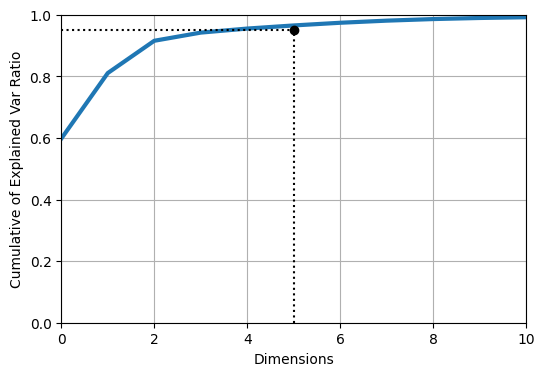

In [41]:
# Dimensionality Reduction using PCA


pca = PCA()
pca.fit(X_train_pipeline)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Cumulative of Explained Var Ratio")
plt.plot([d, d], [0, 0.95], "k:")           
plt.plot([0, d], [0.95, 0.95], "k:")        
plt.plot(d, 0.95, "ko")                    
plt.grid(True)
plt.show()

In [42]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

5

Berdasarkan hasil PCA, ternyata untuk menghapus column yang optimal berada di angka 5 column supaya menyisakan sebanyak 95% dari data maka untuk proses ini akan kita bedakan hasil dengan PCA, dan Hasil tanpa PCA untuk menentukan mana yang lebih baik

In [43]:
pca = PCA()
pca.fit(X_train_pipeline)

X_train_final_pca = pca.transform(X_train_pipeline)
X_test_final_pca = pca.transform(X_test_pipeline)

### Feature Selection

In [44]:
import phik

In [45]:
df.phik_matrix()

interval columns not set, guessing: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.474217,0.307671,0.299579,0.706843,0.371062,0.255614,0.369687,0.058617,0.082386,0.160542,0.035676,0.000000,0.008591,0.093598,0.142535,0.033214,0.167358
Administrative_Duration,0.474217,1.000000,0.470209,0.809708,0.582830,0.754630,0.048960,0.109681,0.000000,0.000000,0.061998,0.000000,0.000000,0.000000,0.000000,0.014261,0.000000,0.081927
Informational,0.307671,0.470209,1.000000,0.532162,0.532295,0.662216,0.051621,0.097803,0.000000,0.017527,0.036558,0.000000,0.000000,0.011676,0.051331,0.046149,0.030849,0.100493
Informational_Duration,0.299579,0.809708,0.532162,1.000000,0.532656,0.743941,0.000000,0.079085,0.000000,0.000000,0.027303,0.000000,0.000000,0.000000,0.040437,0.015302,0.000000,0.087157
ProductRelated,0.706843,0.582830,0.532295,0.532656,1.000000,0.773940,0.139568,0.215937,0.000000,0.000000,0.217468,0.072417,0.000000,0.015921,0.096444,0.133240,0.000000,0.163541
ProductRelated_Duration,0.371062,0.754630,0.662216,0.743941,0.773940,1.000000,0.019247,0.054528,0.000000,0.000000,0.092169,0.036508,0.000000,0.000000,0.028366,0.053705,0.003783,0.066571
BounceRates,0.255614,0.048960,0.051621,0.000000,0.139568,0.019247,1.000000,0.907370,0.056028,0.149197,0.165776,0.158140,0.066531,0.035959,0.257827,0.196976,0.051094,0.217242
ExitRates,0.369687,0.109681,0.097803,0.079085,0.215937,0.054528,0.907370,1.000000,0.132936,0.159263,0.183584,0.101112,0.067363,0.033899,0.235470,0.282593,0.076478,0.319236
PageValues,0.058617,0.000000,0.000000,0.000000,0.000000,0.000000,0.056028,0.132936,1.000000,0.021008,0.040873,0.093223,0.086907,0.075252,0.076345,0.245551,0.030945,0.412695
SpecialDay,0.082386,0.000000,0.017527,0.000000,0.000000,0.000000,0.149197,0.159263,0.021008,1.000000,0.422008,0.049602,0.000000,0.011078,0.182722,0.155571,0.361734,0.121517


Berdasarkan hasil diatas, Column revenue memiliki korelasi positif dengan semua column dimana angka terkecil ada di korelasi antara weekend dengan revenue dimana hanya 0.04 atau memiliki korelasi sebanyak 4%. Karena angkanya tidak ada yang terlalu kecil maka semua fitur akan disimpan untuk proses machine learning ini.

# Model Definition

In [46]:
# Definisi model logistic regression
log_model = LogisticRegression(penalty='l2', C=1.0, random_state=0)

# Definisi model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Definisi model Decision Tree
dt_model = DecisionTreeClassifier()

# Definisi mdoel Random Forest
rf_model = RandomForestClassifier()

# SCV Kernel=Linear
svm_scaled = SVC(kernel='linear')

# SCV Kernel=Polynomial
svm_poly = SVC(kernel='poly')

# SCV Kernel=RBF
svm_rbf = SVC(kernel='rbf')

# Ada Boost
Ada_model = AdaBoostClassifier()

# Model Training

Dalam bagian ini, kita melakukan berbagai model training dengan data yang berbeda dimana:
- Model tanpa angka : data frame yang sudah di pca
- Model dengan angka 1 : data frame yang utuh
- Model dengan angka 2 : data frame yang sudah di SMOTENC

### Cross Validation

In [47]:
# logistic regression
score_log = cross_val_score(log_model, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# logistic regression
score_log_1 = cross_val_score(log_model, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# logistic regression
score_log_2 = cross_val_score(log_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [48]:
# Decision tree
score_dt = cross_val_score(dt_model, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# Decision tree
score_dt_1 = cross_val_score(dt_model, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# Decision tree
score_dt_2 = cross_val_score(dt_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [49]:
# KNN
score_knn = cross_val_score(knn_model, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# KNN
score_knn_1 = cross_val_score(knn_model, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# KNN
score_knn_2 = cross_val_score(knn_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [50]:
# Random Forest
score_rf = cross_val_score(rf_model, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# Random Forest
score_rf_1 = cross_val_score(rf_model, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# Random Forest
score_rf_2 = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [51]:
# SVC (linear)
score_svc_lin = cross_val_score(svm_scaled, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# SVC (linear)
score_svc_lin_1 = cross_val_score(svm_scaled, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# SVC (linear)
score_svc_lin_2 = cross_val_score(svm_scaled, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [52]:
# SVC (Poly)
score_svc_poly = cross_val_score(svm_poly, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# SVC (Poly)
score_svc_poly_1 = cross_val_score(svm_poly, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# SVC (Poly)
score_svc_poly_2 = cross_val_score(svm_poly, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [53]:
# SVC (Rbf)
score_svc_rbf = cross_val_score(svm_rbf, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# SVC (Rbf)
score_svc_rbf_1 = cross_val_score(svm_rbf, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# SVC (Rbf)
score_svc_rbf_2 = cross_val_score(svm_rbf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [54]:
# Ada Boost
score_ada = cross_val_score(Ada_model, X_train_final_pca, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# Ada Boost
score_ada_1 = cross_val_score(Ada_model, X_train_final, y_train, cv=5, scoring='accuracy',n_jobs=-1)
# Ada Boost
score_ada_2 = cross_val_score(Ada_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy',n_jobs=-1)

In [55]:
#Logistic Regression
print('Logistic Regression PCA')
print('Accuracy Score - Mean - Cross Validation: ', round(score_log.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_log.std(),3))
print('')

#Logistic Regression
print('Logistic Regression')
print('Accuracy Score - Mean - Cross Validation: ', round(score_log_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_log_1.std(),3))
print('')

#Logistic Regression
print('Logistic Regression Balanced')
print('Accuracy Score - Mean - Cross Validation: ', round(score_log_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_log_2.std(),3))

Logistic Regression PCA
Accuracy Score - Mean - Cross Validation:  0.874
Accuracy Score - Std - Cross Validation:  0.006

Logistic Regression
Accuracy Score - Mean - Cross Validation:  0.874
Accuracy Score - Std - Cross Validation:  0.006

Logistic Regression Balanced
Accuracy Score - Mean - Cross Validation:  0.836
Accuracy Score - Std - Cross Validation:  0.024


In [56]:
#knn
print('knn PCA')
print('Accuracy Score - Mean - Cross Validation: ', round(score_knn.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_knn.std(),3))
print('')

#knn
print('knn')
print('Accuracy Score - Mean - Cross Validation: ', round(score_knn_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_knn_1.std(),3))
print('')

#knn
print('knn Balanced')
print('Accuracy Score - Mean - Cross Validation: ', round(score_knn_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_knn_2.std(),3))

knn PCA
Accuracy Score - Mean - Cross Validation:  0.814
Accuracy Score - Std - Cross Validation:  0.005

knn
Accuracy Score - Mean - Cross Validation:  nan
Accuracy Score - Std - Cross Validation:  nan

knn Balanced
Accuracy Score - Mean - Cross Validation:  nan
Accuracy Score - Std - Cross Validation:  nan


In [57]:
#Decision Tree
print('Decision Tree PCA')
print('Accuracy Score - Mean - Cross Validation: ', round(score_dt.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_dt.std(),3))
print('')

#Decision Tree
print('Decision Tree')
print('Accuracy Score - Mean - Cross Validation: ', round(score_dt_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_dt_1.std(),3))
print('')

print('Decision Tree Balanced')
print('Accuracy Score - Mean - Cross Validation: ', round(score_dt_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_dt_2.std(),3))

Decision Tree PCA
Accuracy Score - Mean - Cross Validation:  0.845
Accuracy Score - Std - Cross Validation:  0.003

Decision Tree
Accuracy Score - Mean - Cross Validation:  0.863
Accuracy Score - Std - Cross Validation:  0.004

Decision Tree Balanced
Accuracy Score - Mean - Cross Validation:  0.893
Accuracy Score - Std - Cross Validation:  0.055


In [58]:
#Random Forest
print('Random Forest')
print('Accuracy Score - Mean - Cross Validation: ', round(score_rf.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_rf.std(),3))
print('')

#Random Forest
print('Random Forest')
print('Accuracy Score - Mean - Cross Validation: ', round(score_rf_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_rf_1.std(),3))
print('')

#Random Forest
print('Random Forest Balance')
print('Accuracy Score - Mean - Cross Validation: ', round(score_rf_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_rf_2.std(),3))

Random Forest
Accuracy Score - Mean - Cross Validation:  0.896
Accuracy Score - Std - Cross Validation:  0.005

Random Forest
Accuracy Score - Mean - Cross Validation:  0.903
Accuracy Score - Std - Cross Validation:  0.005

Random Forest Balance
Accuracy Score - Mean - Cross Validation:  0.93
Accuracy Score - Std - Cross Validation:  0.052


In [59]:
#SVM Linear
print('SVM Linear PCA')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_lin.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_lin.std(),3))
print('')

#SVM Linear
print('SVM Linear')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_lin_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_lin_1.std(),3))
print('')

#SVM Linear
print('SVM Linear Balanced')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_lin_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_lin_2.std(),3))

SVM Linear PCA
Accuracy Score - Mean - Cross Validation:  0.883
Accuracy Score - Std - Cross Validation:  0.004

SVM Linear
Accuracy Score - Mean - Cross Validation:  0.883
Accuracy Score - Std - Cross Validation:  0.004

SVM Linear Balanced
Accuracy Score - Mean - Cross Validation:  0.861
Accuracy Score - Std - Cross Validation:  0.026


In [60]:
#SVM Polynomial
print('SVM Poly PCA')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_poly.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_poly.std(),3))
print('')

#SVM Polynomial
print('SVM Poly')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_poly_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_poly_1.std(),3))
print('')

#SVM Polynomial
print('SVM Poly Balanced')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_poly_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_poly_2.std(),3))

SVM Poly PCA
Accuracy Score - Mean - Cross Validation:  0.848
Accuracy Score - Std - Cross Validation:  0.001

SVM Poly
Accuracy Score - Mean - Cross Validation:  0.849
Accuracy Score - Std - Cross Validation:  0.001

SVM Poly Balanced
Accuracy Score - Mean - Cross Validation:  0.73
Accuracy Score - Std - Cross Validation:  0.014


In [61]:
#SVM RBF
print('SVM RBF PCA')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_rbf.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_rbf.std(),3))
print('')

#SVM RBF
print('SVM RBF')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_rbf_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_rbf_1.std(),3))
print('')

#SVM RBF
print('SVM RBF Balanced')
print('Accuracy Score - Mean - Cross Validation: ', round(score_svc_rbf_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_svc_rbf_2.std(),3))

SVM RBF PCA
Accuracy Score - Mean - Cross Validation:  0.847
Accuracy Score - Std - Cross Validation:  0.001

SVM RBF
Accuracy Score - Mean - Cross Validation:  0.847
Accuracy Score - Std - Cross Validation:  0.0

SVM RBF Balanced
Accuracy Score - Mean - Cross Validation:  0.742
Accuracy Score - Std - Cross Validation:  0.014


In [62]:
#Ada boost 
print('Ada Boost PCA')
print('Accuracy Score - Mean - Cross Validation: ', round(score_ada.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_ada.std(),3))
print('')

#Ada boost 
print('Ada boost')
print('Accuracy Score - Mean - Cross Validation: ', round(score_ada_1.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_ada_1.std(),3))
print('')

#Ada boost 
print('Ada boost Balanced')
print('Accuracy Score - Mean - Cross Validation: ', round(score_ada_2.mean(),3))
print('Accuracy Score - Std - Cross Validation: ', round(score_ada_2.std(),3))

Ada Boost PCA
Accuracy Score - Mean - Cross Validation:  0.89
Accuracy Score - Std - Cross Validation:  0.006

Ada boost
Accuracy Score - Mean - Cross Validation:  0.888
Accuracy Score - Std - Cross Validation:  0.003

Ada boost Balanced
Accuracy Score - Mean - Cross Validation:  0.907
Accuracy Score - Std - Cross Validation:  0.05


In [63]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM(Linear)','SVM(Poly)','SVM(Rbf)','Ada boost']
Accuracy_mean = [score_log.mean(), score_knn.mean(), score_dt.mean(), score_rf.mean(), score_svc_lin.mean(), score_svc_poly.mean(),score_svc_rbf.mean(), score_ada.mean()]
Accuracy_std = [score_log.std(), score_knn.std(), score_dt.std(), score_rf.std(), score_svc_lin.std(), score_svc_poly.std(),score_svc_rbf.std(), score_ada.std()]

summary_table = pd.DataFrame({'Model': models, 'Accuracy Mean (Cross Validation)': Accuracy_mean, 'Accuracy Std (Cross Validation)': Accuracy_std})
summary_table = summary_table.round(3)
summary_table

,Model,Accuracy Mean (Cross Validation),Accuracy Std (Cross Validation)
0,Logistic Regression,0.874,0.006
1,KNN,0.814,0.005
2,Decision Tree,0.845,0.003
3,Random Forest,0.896,0.005
4,SVM(Linear),0.883,0.004
5,SVM(Poly),0.848,0.001
6,SVM(Rbf),0.847,0.001
7,Ada boost,0.890,0.006


Dari hasil diatas, terdapat bahwa untuk data yang sudah di PCA, Hasil terbaik bisa ditemukan di metode random forest maka model random forest akan dilanjutkan untuk proses hyper parameter

In [64]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM(Linear)','SVM(Poly)','SVM(Rbf)','Ada Boost']
Accuracy_mean_1 = [score_log_1.mean(), score_knn_1.mean(), score_dt_1.mean(), score_rf_1.mean(), score_svc_lin_1.mean(), score_svc_poly_1.mean(),score_svc_rbf_1.mean(),score_ada_1.mean()]
Accuracy_std_1 = [score_log_1.std(), score_knn_1.std(), score_dt_1.std(), score_rf_1.std(), score_svc_lin_1.std(), score_svc_poly_1.std(),score_svc_rbf_1.std(),score_ada_1.std()]

summary_table_1 = pd.DataFrame({'Model': models, 'Accuracy Mean (Cross Validation)': Accuracy_mean_1, 'Accuracy Std (Cross Validation)': Accuracy_std})
summary_table_1 = summary_table_1.round(3)
summary_table_1

,Model,Accuracy Mean (Cross Validation),Accuracy Std (Cross Validation)
0,Logistic Regression,0.874,0.006
1,KNN,NaN,0.005
2,Decision Tree,0.863,0.003
3,Random Forest,0.903,0.005
4,SVM(Linear),0.883,0.004
5,SVM(Poly),0.849,0.001
6,SVM(Rbf),0.847,0.001
7,Ada Boost,0.888,0.006


Dari hasil diatas, untuk data yang utuh model terbaik dapat ditemukan di model random forest maka model random forest akan dipakai untuk proses hyper parameter tuning

In [65]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM(Linear)','SVM(Poly)','SVM(Rbf)','Ada boost']
Accuracy_mean_2 = [score_log_2.mean(), score_knn_2.mean(), score_dt_2.mean(), score_rf_2.mean(), score_svc_lin_2.mean(), score_svc_poly_2.mean(),score_svc_rbf_2.mean(),score_ada_2.mean()]
Accuracy_std_2 = [score_log_2.std(), score_knn_2.std(), score_dt_2.std(), score_rf_2.std(), score_svc_lin_2.std(), score_svc_poly_2.std(),score_svc_rbf_2.std(),score_ada_2.std()]

summary_table_2 = pd.DataFrame({'Model': models, 'Accuracy Mean (Cross Validation)': Accuracy_mean_2, 'Accuracy Std (Cross Validation)': Accuracy_std})
summary_table_2 = summary_table_2.round(3)
summary_table_2

,Model,Accuracy Mean (Cross Validation),Accuracy Std (Cross Validation)
0,Logistic Regression,0.836,0.006
1,KNN,NaN,0.005
2,Decision Tree,0.893,0.003
3,Random Forest,0.930,0.005
4,SVM(Linear),0.861,0.004
5,SVM(Poly),0.730,0.001
6,SVM(Rbf),0.742,0.001
7,Ada boost,0.907,0.006


Untuk hasil data yang sudah di SMOTENC, random forest adalah model dengan hasil terbaik maka akan dilakukan hyper parameter tuning dengan model random forest

# Hyper parameter tuning

In [66]:
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

In [67]:
# Definisi parameter
grid_parameters = {'min_samples_leaf': [1, 2, 4], 
                   'max_depth': [None, 1, 2], 
                   'criterion': ['gini', 'entropy'], 
                   'min_samples_split': [2, 4, 6],
                   'n_estimators': [5, 10, 20]}
grid = GridSearchCV(estimator=rf_model, param_grid=grid_parameters,verbose=3, refit=True,scoring ='accuracy', 
                    cv = 5, return_train_score=True, n_jobs=-1
                    )
grid.fit(X_train_final_pca,y_train_encoded)

# Finding the best hyper parameter
best_rf=grid.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\daffa\miniconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [68]:
# Definisi parameter
grid_parameters = {'min_samples_leaf': [1, 2, 4], 
                   'max_depth': [None, 1, 2], 
                   'criterion': ['gini', 'entropy'], 
                   'min_samples_split': [2, 4, 6],
                   'n_estimators': [5, 10, 20]}
grid_1 = GridSearchCV(estimator=rf_model, param_grid=grid_parameters,verbose=3, refit=True,scoring ='accuracy', 
                    cv = 5, return_train_score=True, n_jobs=-1
                    )
grid_1.fit(X_train_final,y_train_encoded)

# Finding the best hyper parameter
best_rf_1=grid_1.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\daffa\miniconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [69]:
# Definisi parameter
grid_parameters = {'min_samples_leaf': [1, 2, 4], 
                   'max_depth': [None, 1, 2], 
                   'criterion': ['gini', 'entropy'], 
                   'min_samples_split': [2, 4, 6],
                   'n_estimators': [5, 10, 20]}
grid_2 = GridSearchCV(estimator=rf_model, param_grid=grid_parameters,verbose=3, refit=True,scoring ='accuracy', 
                    cv = 5, return_train_score=True, n_jobs=-1
                    )
grid_2.fit(X_train_balanced,y_train_balanced)

# Finding the best hyper parameter
best_rf_2=grid_2.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [70]:
best_rf

RandomForestClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=6, n_estimators=20)

In [71]:
best_rf_1

RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_estimators=20)

In [72]:
best_rf_2

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=20)

# Model Evaluation

### Model with PCA

In [73]:
y_pred_train_pca = best_rf.predict(X_train_final_pca)
y_pred_test = best_rf.predict(X_test_final_pca)

print('Classification Report Train: \n', classification_report(y_train, y_pred_train_pca), '\n')
print('Classification Report Test: \n', classification_report(y_test, y_pred_test), '\n')

Classification Report Train: 
               precision    recall  f1-score   support

       False       0.96      1.00      0.98      8264
        True       0.98      0.78      0.87      1499

    accuracy                           0.96      9763
   macro avg       0.97      0.89      0.92      9763
weighted avg       0.96      0.96      0.96      9763
 

Classification Report Test: 
               precision    recall  f1-score   support

       False       0.89      0.98      0.93      2032
        True       0.80      0.41      0.54       409

    accuracy                           0.88      2441
   macro avg       0.84      0.69      0.74      2441
weighted avg       0.88      0.88      0.87      2441
 



Berdasarkan hasil diatas, nilai accuracy dari model ini sudah tergolong tinggi tetapi model bisa tergolong overfit karena model train dan model set masih memiliki selisih yang agak tinggi yaitu model train memiliki accuracy 96% dan model test memiliki accuracy 88% dimana terdapat selisih 8%, lalu model test memiliki nilai recall yang jelek yaitu 97% dan 45% dimana ini memberitahukan bahwa nilai false negative dari model ini masih tergolong banyak dimana model nya sendiri kesulitan di test set terutama dalam menentukan apakah pengunjung akan melakukan pembelian atau tidak.

### Model without PCA & SMOTENC

In [74]:
y_pred_train = best_rf_1.predict(X_train_final)
y_pred_test_1 = best_rf_1.predict(X_test_final)

print('Classification Report Train : \n', classification_report(y_train, y_pred_train), '\n')
print('Classification Report Test : \n', classification_report(y_test, y_pred_test_1), '\n')

Classification Report Train : 
               precision    recall  f1-score   support

       False       0.96      0.99      0.97      8264
        True       0.93      0.75      0.83      1499

    accuracy                           0.95      9763
   macro avg       0.94      0.87      0.90      9763
weighted avg       0.95      0.95      0.95      9763
 

Classification Report Test : 
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      2032
        True       0.78      0.51      0.62       409

    accuracy                           0.89      2441
   macro avg       0.84      0.74      0.78      2441
weighted avg       0.89      0.89      0.88      2441
 



Berdasarkan hasil diatas, ada peningkatan hasil dari model sebelum di PCA dimana ini memberitahukan bahwa accracy model ini di train set adalah 95% sementara accuracy di test set adalah 89%. Hasil ini masih tergolong overfit karena train set masih lebih bagus dari test set lalu model ini memiliki nilai f1 score dan recall score lebih baik daripada model sebelumnya dimana hasil false negative dalam model ini tergolong lebih sedikit dibandingkan model sebelumnya yaitu model dengan data PCA.

### Model with SMOTENC

In [75]:
y_pred_train_2 = best_rf_2.predict(X_train_balanced)
y_pred_test_2 = best_rf_2.predict(X_test_final)

print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_2), '\n')

Classification Report : 
               precision    recall  f1-score   support

       False       0.99      1.00      0.99      8264
        True       1.00      0.99      0.99      8264

    accuracy                           0.99     16528
   macro avg       0.99      0.99      0.99     16528
weighted avg       0.99      0.99      0.99     16528
 

Classification Report : 
               precision    recall  f1-score   support

       False       0.93      0.94      0.94      2032
        True       0.69      0.66      0.68       409

    accuracy                           0.89      2441
   macro avg       0.81      0.80      0.81      2441
weighted avg       0.89      0.89      0.89      2441
 



Berdasarkan hasil diatas, untuk model train bisa tergolong terlalu bagus atau terlalu sempurna dengan nilai accuracy full 100% sementara untuk test set sendiri memiliki nilai accuracy 89% dimana model masih bisa tergolong overfit. tetapi model ini memiliki recall score dan f1 score terbaik jika dibandingkan dengan semua model lainnya dimana itu memberitahukan bahwa false negative dari data ini berjumlah paling sedikit tetapi nilai precision dari data ini memiliki score terendah jika dibandingkan dengan model lain dimana hal ini mengindikasikan bahwa false positive dari model ini memiliki jumlah terbanyak. 

Dari ketiga model ini, maka diambil keputusan bahwa model terakhir yang akan digunakan adalah model dengan nomor 2 atau model yang telah dilaksanakan SMOTENC. Setelah memilih model makan langkah selanjutnya adalah menentukan ciri-ciri dari prediksi yang salah seperti false positive dan false negative.

In [76]:
X_test_1 = X_test.copy()
X_test_1['Revenue'] = y_test

In [77]:
X_test_1['Prediction'] = y_pred_test_2

In [78]:
X_test_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Prediction
2981,3,49.750,0,0.000000,59,754.226191,0.000000,0.003333,0.000000,0.0,May,3,2,7,11,New_Visitor,False,False,False
8889,0,0.000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,1,1,1,Other,False,False,False
3528,0,0.000,1,134.333333,16,765.445454,0.006667,0.006000,0.000000,0.8,May,2,10,1,1,Returning_Visitor,False,False,False
9985,2,67.500,0,0.000000,7,393.500000,0.000000,0.025000,0.000000,0.0,Dec,2,2,1,2,New_Visitor,False,False,False
3855,1,9.000,0,0.000000,111,2451.869048,0.000000,0.015776,2.797415,0.4,May,2,2,8,3,Returning_Visitor,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,0.000,0,0.000000,54,4749.250000,0.004938,0.029938,8.285119,0.0,Oct,2,2,8,1,Returning_Visitor,True,True,False
4510,0,0.000,0,0.000000,9,87.500000,0.000000,0.033333,0.000000,0.0,May,2,2,2,4,Returning_Visitor,False,False,False
5577,0,0.000,0,0.000000,45,2347.333333,0.004545,0.015909,0.000000,0.0,Nov,2,4,1,1,Returning_Visitor,False,False,False
4212,0,0.000,0,0.000000,19,989.333333,0.000000,0.011111,25.109000,0.0,May,3,2,1,2,New_Visitor,True,True,True


In [79]:
True_negative = X_test_1[(X_test_1['Revenue'] == 0 ) & (X_test_1['Prediction'] == 0)]
True_negative.select_dtypes(exclude='object').mean()

Administrative               1.901725
Administrative_Duration     67.536827
Informational                0.404077
Informational_Duration      26.926522
ProductRelated              26.726607
ProductRelated_Duration    983.015518
BounceRates                  0.024581
ExitRates                    0.047572
PageValues                   0.720781
SpecialDay                   0.073706
OperatingSystems             2.198641
Browser                      2.350235
Region                       3.099843
TrafficType                  4.055410
Weekend                      0.227392
Revenue                      0.000000
Prediction                   0.000000
dtype: float64

In [80]:
False_negative = X_test_1[(X_test_1['Revenue'] == 1 ) & (X_test_1['Prediction'] == 0)]
False_negative.select_dtypes(exclude='object').mean()


Administrative                3.347826
Administrative_Duration     116.912186
Informational                 0.818841
Informational_Duration       77.259693
ProductRelated               51.057971
ProductRelated_Duration    1983.673838
BounceRates                   0.009845
ExitRates                     0.029519
PageValues                    6.373004
SpecialDay                    0.014493
OperatingSystems              1.992754
Browser                       2.507246
Region                        3.007246
TrafficType                   3.905797
Weekend                       0.304348
Revenue                       1.000000
Prediction                    0.000000
dtype: float64

Berdasarkan persebaran data diatas, salah satu faktor yang menyebabkan terjadinya false negative adalah rendahnya nilai page values dimana nilai page values dari kategori false negative yaitu 5.5 dianggap mendekati dengan nilai page values di kategori true negative yaitu 0.5. Lalu faktor lain yang mempengaruhi adalah tingginya nilai bounce rates yaitu 0.02 dimana membuat model mengklasifikasikan sebagai hasil negative dan mendekati hasil true negative yaitu 0.01 yang menyebabkan model memprediksi bahwa pengunjung tersebut tidak membeli yang seharusnya pengunjung tersebut berhasil melakukan pembelian. 

In [81]:
True_positive = X_test_1[(X_test_1['Revenue'] == 1 ) & (X_test_1['Prediction'] == 1)]
True_positive.select_dtypes(exclude='object').mean()

Administrative                3.284133
Administrative_Duration     116.402493
Informational                 0.856089
Informational_Duration       61.186305
ProductRelated               46.660517
ProductRelated_Duration    1816.766139
BounceRates                   0.002683
ExitRates                     0.015779
PageValues                   35.179911
SpecialDay                    0.022140
OperatingSystems              2.132841
Browser                       2.442804
Region                        3.029520
TrafficType                   3.959410
Weekend                       0.265683
Revenue                       1.000000
Prediction                    1.000000
dtype: float64

In [82]:
False_positive = X_test_1[(X_test_1['Revenue'] == 0 ) & (X_test_1['Prediction'] == 1)]
False_positive.select_dtypes(exclude='object').mean()

Administrative                5.344538
Administrative_Duration     163.136896
Informational                 1.084034
Informational_Duration       78.281909
ProductRelated               69.285714
ProductRelated_Duration    2632.700168
BounceRates                   0.003871
ExitRates                     0.017309
PageValues                   20.441646
SpecialDay                    0.011765
OperatingSystems              2.117647
Browser                       2.478992
Region                        3.075630
TrafficType                   3.630252
Weekend                       0.210084
Revenue                       0.000000
Prediction                    1.000000
dtype: float64

Berdasarkan faktor diatas, faktor yang menyebabkan terjadinya kesalahan dalam memprediksi adalah dengan nilai bounce rates yang sangat rendah dimana nilai nya mencapai 0.004, nilai itu mendekati dengan nilai bounce rates true positive yaitu 0.003. Faktor lain yang menyebabkan terjadinya kesalahan memprediksi adalah di column Page Values dimana hasil dari kategori false positive ini menghasilkan nilai 20 dimana hasil itu mendekati dengan hasil true positive yaitu 35 dimana hal itu menyebabkan terjadinya kesalahan dalam memprediksi

### Kesimpulan Model

Secara Keseluruhan, Akurasi dari model sudah tergolong tinggi yaitu mendapatkan score 89% di test set dan 100% di train set. Tetapi hasil ini masih tergolong overfit dikarenakan selisih yang tinggi antara train dan test yaitu 11%. Kelebihan dari model ini adalah nilai precision, recall dan f1 score yang tergolong konsissten maka hasil prediksi di test lebih konsisten. Tetapi kelemahan dari model ini adalah kesulitannya untuk memprediksi ciri-ciri orang yang akan melakukan pembelian hal ini juga dapat ditemukan di model-model lain dan hal ini dikarenakan jumlah kelas yang tidak seimbang dimana lebih banyak pengunjung yang tidak membeli dibandingkan pengunjung yang membeli. Setelah dilakukan oversampling juga masih memiliki hasil yang mirip dengan tanpa dilakukan over sampling, maka ada faktor lain diluar data yang menyebabkan kesulitan model dalam memprediksi hasil pengunjung yang membeli di test set dan bisa juga dikarenakan perlunya data yang lebih banyak supaya lebih bisa secara akurat memprediksi hasil yang diinginkan.

# Model Saving

In [83]:
import pickle
with open('preprocess_pipeline.pkl','wb') as file_1:
  pickle.dump(preprocess_pipeline, file_1)

with open('best_rf_2.pkl','wb') as file_2:
  pickle.dump(best_rf_2, file_2)

# Model Inference

Model inference berhasil dilakukan di file Online_Shoppers_Inference.ipynb

# Conclusion

Untuk menyimpulkan proses machine learning ini,

Dalam bagian EDA, Terlihat bahwa dari jumlah pengunjung lebih banyak pengunjung yang memutuskan untuk tidak membeli daripada pengunjung yang membeli dimana perbandingannya terdapat 84.5% untuk pengunjung yang tidak membeli dan sebanyak 14.5% pengunjung yang membeli dari sebanyak 12,330 pengunjung dalam 10 bulan, dari jumlah itu lebih banyak pengunjung yang sebelumnya sudah pernah mengunjungi website H8 dibandingkan pengunjung yang baru. Ini menunjukan bahwa, website H8 memiliki kemampuan yang baik dalam membuat pengunjung untuk mengunjungi lagi website H8 tetapi website H8 memiliki kelemahan dimana kebanyakan pengunjung lama ini pada akhirnya tidak membuat pembelian. Di sisi lain, pengunjung baru yang mengunjungi website H8, sebanyak 25% dari jumlah pengunjung baru berhasil melakukan pembelian dimana hal ini menunjukan bahwa website H8 memiliki conversion rate yang bagus untuk pengunjung baru tetapi kurang efektif untuk pengunjung lama. Lalu faktor lain yang berpengaruh terhadap proses transaksi adalah metric lain seperti page values dan bounce rates. Semakin tinggi sebuah Page values maka semakin tinggi juga Kemungkinan seseorang membuat pembelian dan sebaliknya semakin rendah bounce rates semakin menambah kemungkinan sesorang membuat pembelian.

Dalam bagian model nya sendiri, dengan menggunakan model random forest dan berbagai proses hyper parameter tuning serta mengetes menggunakan data yang dikurangi dimensinya serta dengan proses oversampling ditemukan bahwa Secara keseluruhan, model memiliki tingkat akurasi yang tinggi dengan mencapai skor 89% di set pengujian (test set) dan 100% di set pelatihan (train set). Namun, terdapat tanda-tanda overfitting karena perbedaan yang signifikan antara akurasi pada train set dan test set, yakni sebesar 11%. Kelebihan dari model ini adalah konsistensi dalam nilai precision, recall, dan f1 score, yang menghasilkan prediksi yang stabil di set pengujian. Namun, model ini memiliki kelemahan dalam memprediksi ciri-ciri orang yang akan melakukan pembelian, sebuah masalah yang juga dapat ditemui pada model lain. Ini disebabkan oleh ketidakseimbangan jumlah kelas, di mana jumlah pengunjung yang tidak melakukan pembelian jauh lebih banyak daripada yang melakukan pembelian.

Meskipun telah dilakukan oversampling, hasilnya tetap mirip dengan ketika tidak ada oversampling yang dilakukan. Ini mengindikasikan bahwa terdapat faktor-faktor lain di luar data yang menyebabkan kesulitan model dalam memprediksi hasil pengunjung yang melakukan pembelian pada set pengujian. Selain itu, perlunya data tambahan yang lebih besar mungkin diperlukan untuk meningkatkan kemampuan model dalam memprediksi hasil dengan lebih akurat. 

Dalam perihal Bisnis, Perusahaan H8 harus mencari proses atau promosi lainnya untuk menarik pengunjung lama agara pada akhirnya mereka jadi lebih mau untuk melaksanakan pembelian di website H8, contoh promosi bisa seperti pembuatan membership, diskon, dan promosi melalui influencer, dll. Mereka juga harus meningkatkan promosi dalam menarik pengunjung baru karena conversion rate untuk pengunjung baru sudah tergolong bagus karena bisa membuat 25% dari total pengunjung baru untuk melakukan pembelian maka hal itu bisa dimanfaatkan oleh H8 untuk mereka agar menarik lebih banyak pengunjung baru lagi dengan promosi melalu social media, promosi secara fisik, dll.